In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import pickle

In [2]:
types = {
    "audio_feats_mode":int,
    "audio_feats_time_signature":int,
    "audio_feats_key":int,
    "audio_feats_danceability":float,
    "audio_feats_energy":float,
    "audio_feats_loudness":float,
    "audio_feats_speechiness":float,
    "audio_feats_acousticness":float,
    "audio_feats_instrumentalness":float,
    "audio_feats_liveness":float,
    "audio_feats_valence":float,
    "audio_feats_tempo":float,
    "audio_feats_duration_ms":float
}

In [3]:
df = pd.read_csv("data.csv", dtype=types, header=None).dropna(how="any")
df.columns = ['ID', 'artist_name', 'track_name', 'audio_feats_danceability',
       'audio_feats_energy', 'audio_feats_key', 'audio_feats_loudness',
       'audio_feats_mode', 'audio_feats_speechiness',
       'audio_feats_acousticness', 'audio_feats_instrumentalness',
       'audio_feats_liveness', 'audio_feats_valence', 'audio_feats_tempo',
       'audio_feats_duration_ms', 'audio_feats_time_signature']

In [8]:
df.drop_duplicates(subset=["ID"], inplace=True)

In [9]:
df

,ID,artist_name,track_name,audio_feats_danceability,audio_feats_energy,audio_feats_key,audio_feats_loudness,audio_feats_mode,audio_feats_speechiness,audio_feats_acousticness,audio_feats_instrumentalness,audio_feats_liveness,audio_feats_valence,audio_feats_tempo,audio_feats_duration_ms,audio_feats_time_signature
0,0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),0.9040,0.8130,4.0,-7.105,0.0,0.1210,0.03110,0.006970,0.0471,0.8100,125.461,226864.0,4.0
1,6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,Toxic,0.7740,0.8380,5.0,-3.914,0.0,0.1140,0.02490,0.025000,0.2420,0.9240,143.040,198800.0,4.0
2,0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,Crazy In Love,0.6640,0.7590,2.0,-6.583,0.0,0.2090,0.00238,0.000000,0.0598,0.7010,99.252,235933.0,4.0
3,1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,Rock Your Body,0.8920,0.7140,4.0,-6.055,0.0,0.1410,0.20100,0.000234,0.0521,0.8170,100.972,267267.0,4.0
4,1lzr43nnXAijIGYnCT8M8H,Shaggy,It Wasn't Me,0.8530,0.6060,0.0,-4.596,1.0,0.0713,0.05610,0.000000,0.3130,0.6540,94.759,227600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149573,6cVHCeUEJOz8aW6pgbrSXT,"Father Kari, the Gameboy","Trial II. Welcome to Taimagakure, the Wav Village",0.8220,0.6230,10.0,-8.357,1.0,0.3510,0.26900,0.000000,0.1070,0.5730,109.964,280425.0,4.0
2149574,2YpdaJQSPHM1MsMITng93V,Dean Evenson,Let Go,0.0712,0.0310,5.0,-26.889,1.0,0.0531,0.99400,0.982000,0.0995,0.0297,76.160,398707.0,5.0
2149575,7s9RepEmLkr0xx2KeETO9e,Savasana,Ambient Music for Relaxation,0.2040,0.1480,6.0,-22.488,1.0,0.0437,0.97600,0.940000,0.1210,0.0733,89.825,144292.0,3.0
2149576,7DneV7iDFHmuc8wt8sDqzG,Savasana,R-E-M Phase,0.2290,0.0921,9.0,-21.673,1.0,0.0453,0.95900,0.957000,0.1050,0.0351,62.058,203923.0,4.0


In [10]:
np.unique(df["ID"]).shape

(2149378,)

In [11]:
continuous_data = df.drop(columns=["ID", "artist_name", "track_name", "audio_feats_key", "audio_feats_mode", "audio_feats_time_signature"])
continuous_data

,audio_feats_danceability,audio_feats_energy,audio_feats_loudness,audio_feats_speechiness,audio_feats_acousticness,audio_feats_instrumentalness,audio_feats_liveness,audio_feats_valence,audio_feats_tempo,audio_feats_duration_ms
0,0.9040,0.8130,-7.105,0.1210,0.03110,0.006970,0.0471,0.8100,125.461,226864.0
1,0.7740,0.8380,-3.914,0.1140,0.02490,0.025000,0.2420,0.9240,143.040,198800.0
2,0.6640,0.7590,-6.583,0.2090,0.00238,0.000000,0.0598,0.7010,99.252,235933.0
3,0.8920,0.7140,-6.055,0.1410,0.20100,0.000234,0.0521,0.8170,100.972,267267.0
4,0.8530,0.6060,-4.596,0.0713,0.05610,0.000000,0.3130,0.6540,94.759,227600.0
...,...,...,...,...,...,...,...,...,...,...
2149573,0.8220,0.6230,-8.357,0.3510,0.26900,0.000000,0.1070,0.5730,109.964,280425.0
2149574,0.0712,0.0310,-26.889,0.0531,0.99400,0.982000,0.0995,0.0297,76.160,398707.0
2149575,0.2040,0.1480,-22.488,0.0437,0.97600,0.940000,0.1210,0.0733,89.825,144292.0
2149576,0.2290,0.0921,-21.673,0.0453,0.95900,0.957000,0.1050,0.0351,62.058,203923.0


In [12]:
scaler = StandardScaler()
scaled_feats = scaler.fit_transform(continuous_data)

pca = PCA(n_components=3)
pca_feats = pca.fit_transform(scaled_feats)

pca_feats

array([[-2.19658248e+00, -1.29361192e+00, -8.87683980e-01],
       [-2.63215089e+00, -6.70602015e-01, -3.01267420e-01],
       [-1.59941039e+00, -8.51452029e-01,  1.53082773e-02],
       ...,
       [ 4.54106112e+00,  1.32775440e-01,  9.52485594e-03],
       [ 4.75713131e+00,  6.57297456e-04,  7.25920036e-02],
       [ 5.36735658e+00,  1.08679701e+00,  3.64164611e-03]])

In [20]:
pca.explained_variance_

array([3.1097888 , 1.34526832, 1.19433959])

In [18]:
with open("./models/scaler.pickle", "wb") as f:
    pickle.dump(scaler, f)

with open("./models/pca.pickle", "wb") as f:
    pickle.dump(pca, f)

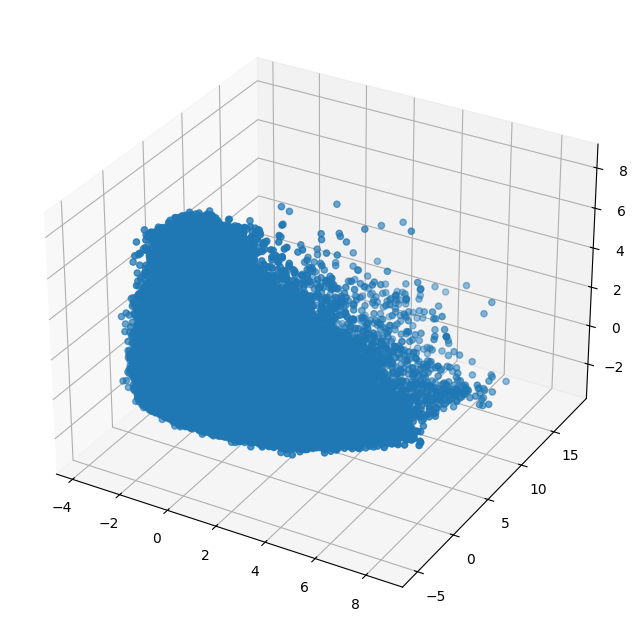

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_feats[:, 0], pca_feats[:, 1], pca_feats[:, 2])
plt.show()

In [14]:
k_mean = KMeans(n_clusters=50)
clustered_data = k_mean.fit_transform(pca_feats)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
with open("./models/kmean.pickle", "wb") as f:
    pickle.dump(k_mean, f)

In [15]:
labels = k_mean.labels_
labels.shape

(2149378,)

In [21]:
df["label"] = labels
df

,ID,artist_name,track_name,audio_feats_danceability,audio_feats_energy,audio_feats_key,audio_feats_loudness,audio_feats_mode,audio_feats_speechiness,audio_feats_acousticness,audio_feats_instrumentalness,audio_feats_liveness,audio_feats_valence,audio_feats_tempo,audio_feats_duration_ms,audio_feats_time_signature,label
0,0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),0.9040,0.8130,4.0,-7.105,0.0,0.1210,0.03110,0.006970,0.0471,0.8100,125.461,226864.0,4.0,30
1,6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,Toxic,0.7740,0.8380,5.0,-3.914,0.0,0.1140,0.02490,0.025000,0.2420,0.9240,143.040,198800.0,4.0,24
2,0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,Crazy In Love,0.6640,0.7590,2.0,-6.583,0.0,0.2090,0.00238,0.000000,0.0598,0.7010,99.252,235933.0,4.0,24
3,1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,Rock Your Body,0.8920,0.7140,4.0,-6.055,0.0,0.1410,0.20100,0.000234,0.0521,0.8170,100.972,267267.0,4.0,30
4,1lzr43nnXAijIGYnCT8M8H,Shaggy,It Wasn't Me,0.8530,0.6060,0.0,-4.596,1.0,0.0713,0.05610,0.000000,0.3130,0.6540,94.759,227600.0,4.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149573,6cVHCeUEJOz8aW6pgbrSXT,"Father Kari, the Gameboy","Trial II. Welcome to Taimagakure, the Wav Village",0.8220,0.6230,10.0,-8.357,1.0,0.3510,0.26900,0.000000,0.1070,0.5730,109.964,280425.0,4.0,49
2149574,2YpdaJQSPHM1MsMITng93V,Dean Evenson,Let Go,0.0712,0.0310,5.0,-26.889,1.0,0.0531,0.99400,0.982000,0.0995,0.0297,76.160,398707.0,5.0,25
2149575,7s9RepEmLkr0xx2KeETO9e,Savasana,Ambient Music for Relaxation,0.2040,0.1480,6.0,-22.488,1.0,0.0437,0.97600,0.940000,0.1210,0.0733,89.825,144292.0,3.0,7
2149576,7DneV7iDFHmuc8wt8sDqzG,Savasana,R-E-M Phase,0.2290,0.0921,9.0,-21.673,1.0,0.0453,0.95900,0.957000,0.1050,0.0351,62.058,203923.0,4.0,25


In [22]:
df.to_csv("processed_data.csv")

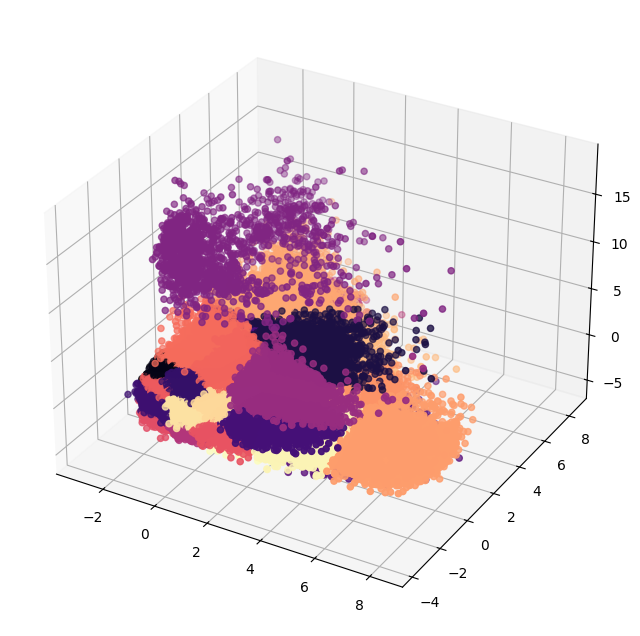

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_feats[:, 2], pca_feats[:, 0],pca_feats[:, 1], c=labels, cmap="magma")
plt.show()

<Axes: xlabel='label'>

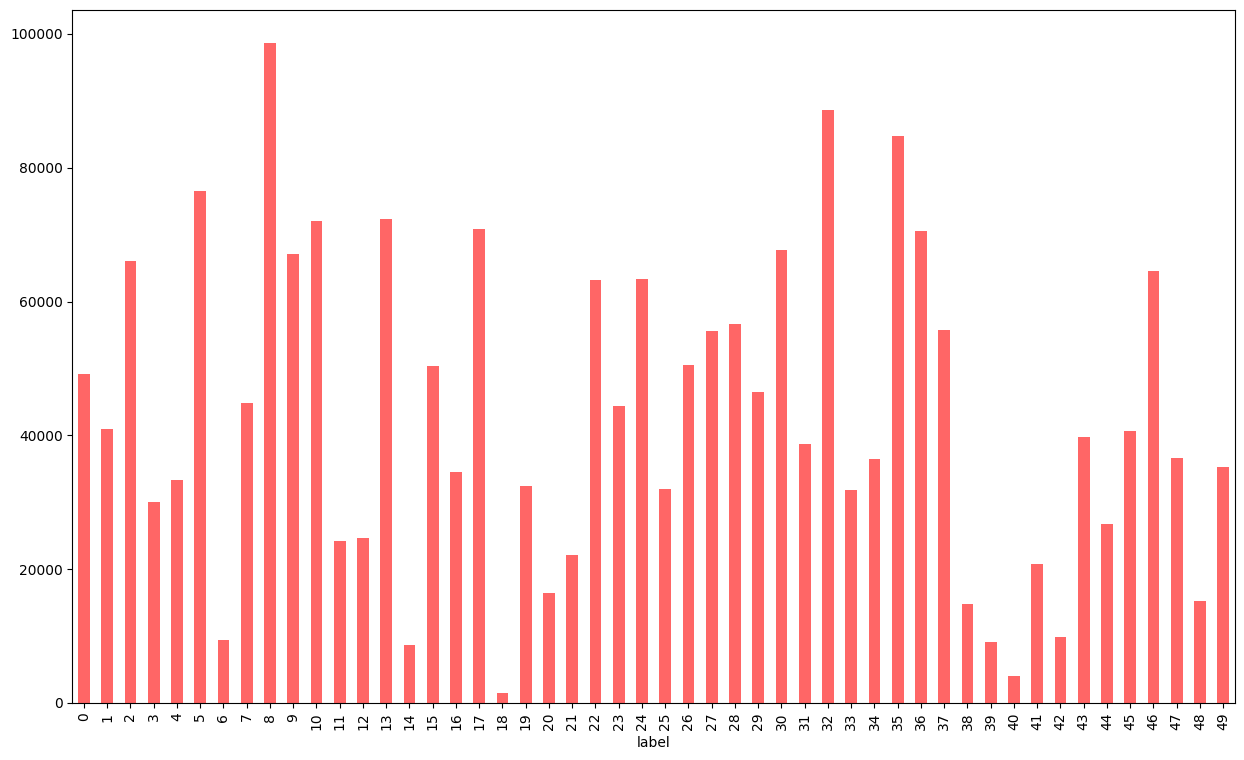

In [43]:
df["label"].value_counts().sort_index().plot(kind="bar", figsize=(15, 9), color="red", alpha=0.6)

---

# Find optimal k

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

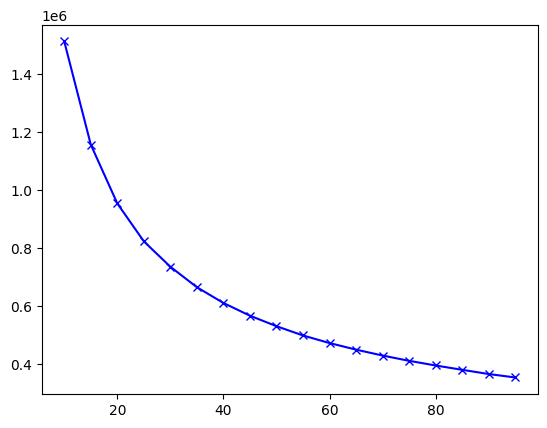

In [17]:
dists = []
K_range = range(10, 100, 5)
for n in K_range:
    kmeans = KMeans(n_clusters=n).fit(pca_feats)
    dists.append(kmeans.inertia_)

plt.plot(K_range, dists, "bx-")
plt.show()

=> k = 50